In [ ]:
#https://www.r-bloggers.com/beautiful-tables-for-linear-model-summaries-rstats/
install.packages("sjPlot",repos = "https://mirror.aarnet.edu.au/pub/CRAN/", dependencies = TRUE)
#http://www.sthda.com/english/wiki/impressive-package-for-3d-and-4d-graph-r-software-and-data-visualization
install.packages("plot3D", repos = "https://mirror.aarnet.edu.au/pub/CRAN/")


In [13]:
#setwd("C:\\Users\\nico\\Google Drive\\2. UTAS\\2017 Sem 2\\KMA253 - Data Handling & Statistics 2\\Assessments\\Project 1")
setwd("D:\\Google Drive\\2. UTAS\\2017 Sem 2\\KMA253 - Data Handling & Statistics 2\\Assessments\\Project 1")
fjords <- read.csv('project_1_fjords.csv', header = TRUE)
fjords$ID <- seq.int(nrow(fjords))
head(fjords)

# Split data accordint to region (NZ or BC)
fjords.NZ <- fjords[fjords$region=='NZ',seq(2,5)]
fjords.BC <- fjords[fjords$region=='BC',seq(2,5)]

region,area,length,width,ID
BC,690,24.4,1.18,1
BC,825,18.8,1.36,2
BC,709,28.8,1.11,3
BC,1137,13.8,1.49,4
BC,6793,88.8,2.27,5
BC,413,13.0,1.57,6


## Look at data

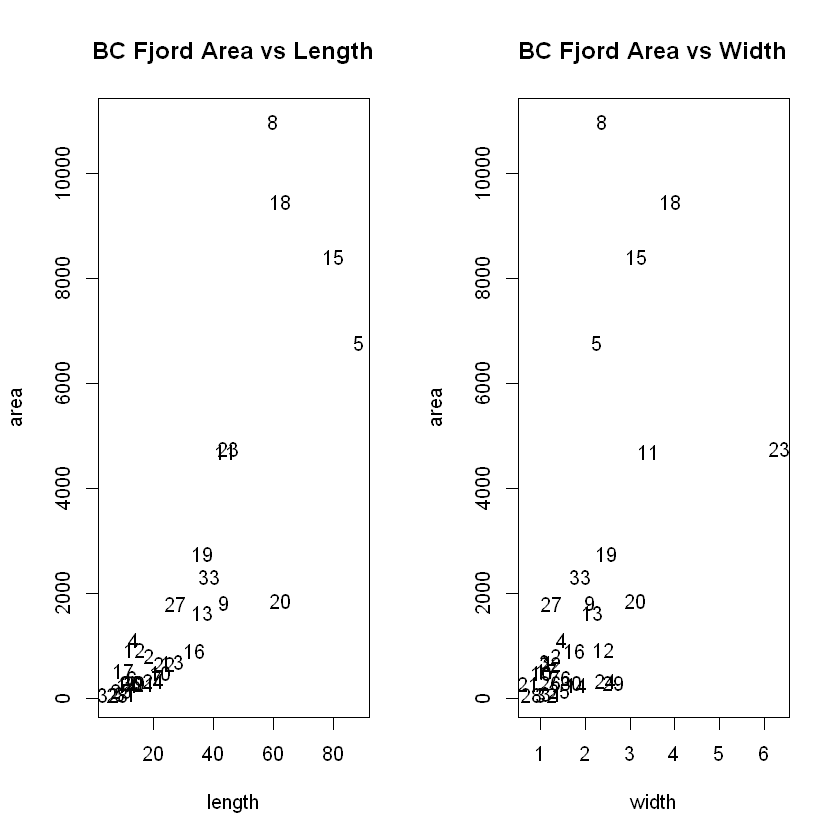

In [68]:
par(mfrow=c(1,2))

plot(area~length, data = fjords.BC, type="n", main="BC Fjord Area vs Length")
text(area~length,data=fjords.BC, labels =fjords.BC$ID)

plot(area~width, data = fjords.BC, type="n", main="BC Fjord Area vs Width")
text(area~width,data=fjords.BC, labels =fjords.BC$ID)

par(mfrow=c(1,1))

# Correlation matrix table

In [16]:
cor(fjords.BC[complete.cases(fjords.BC),seq(1,3)])

,area,length,width
area,1.0000000,0.8360077,0.5848635
length,0.8360077,1.0000000,0.5625138
width,0.5848635,0.5625138,1.0000000


length:width is below .80

### BC ($length + width + length:width$)  - with all data
Adjusted R-squared:  0.7092  
(length + width) = Adjusted R-squared:  0.6993  
width is not significant => remove


Call:
lm(formula = area ~ length + width, data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-3981.0  -624.7    44.9   351.5  5710.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1762.99     583.78  -3.020  0.00513 ** 
length        100.15      15.83   6.326 5.62e-07 ***
width         436.46     305.23   1.430  0.16307    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1585 on 30 degrees of freedom
Multiple R-squared:  0.7181,	Adjusted R-squared:  0.6993 
F-statistic: 38.21 on 2 and 30 DF,  p-value: 5.636e-09


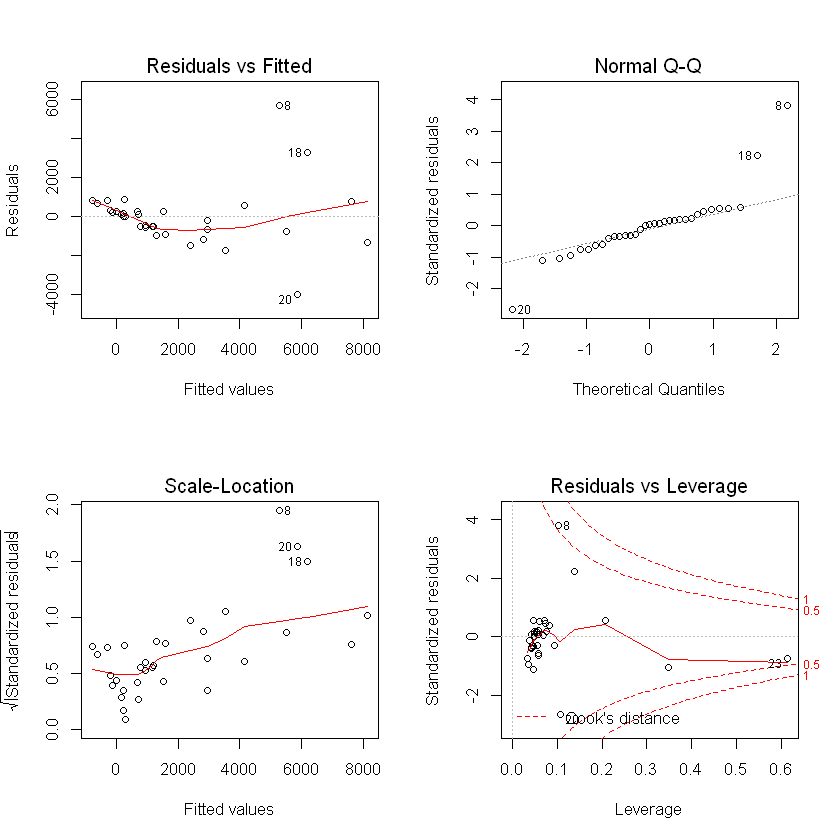

In [8]:
fit.BC <- lm(area~length+width,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

### BC ($length$)  - with all data
Adjusted R-squared:  0.6892  
box cox suggests log transform on Y


Call:
lm(formula = area ~ length, data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-3903.3  -763.0    20.1   655.1  5496.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1274.82     481.46  -2.648   0.0126 *  
length        112.88      13.31   8.483  1.4e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1611 on 31 degrees of freedom
Multiple R-squared:  0.6989,	Adjusted R-squared:  0.6892 
F-statistic: 71.96 on 1 and 31 DF,  p-value: 1.396e-09


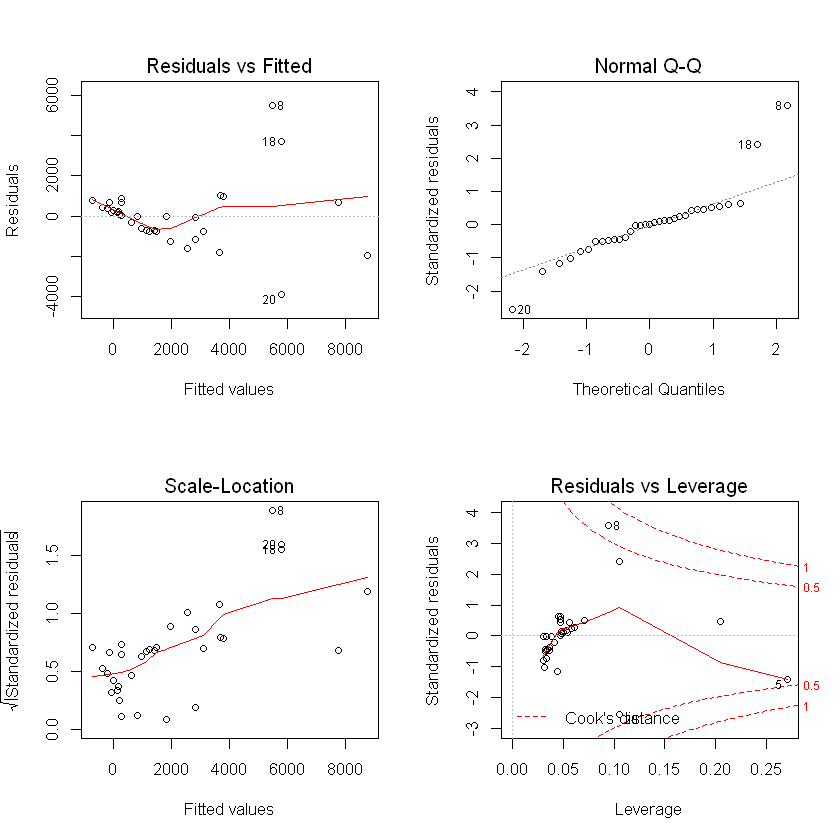

In [9]:
fit.BC2 <- lm(area~length,data=fjords.BC)
summary(fit.BC2)

par(mfrow=c(2,2))
plot(fit.BC2)
par(mfrow=c(1,1))

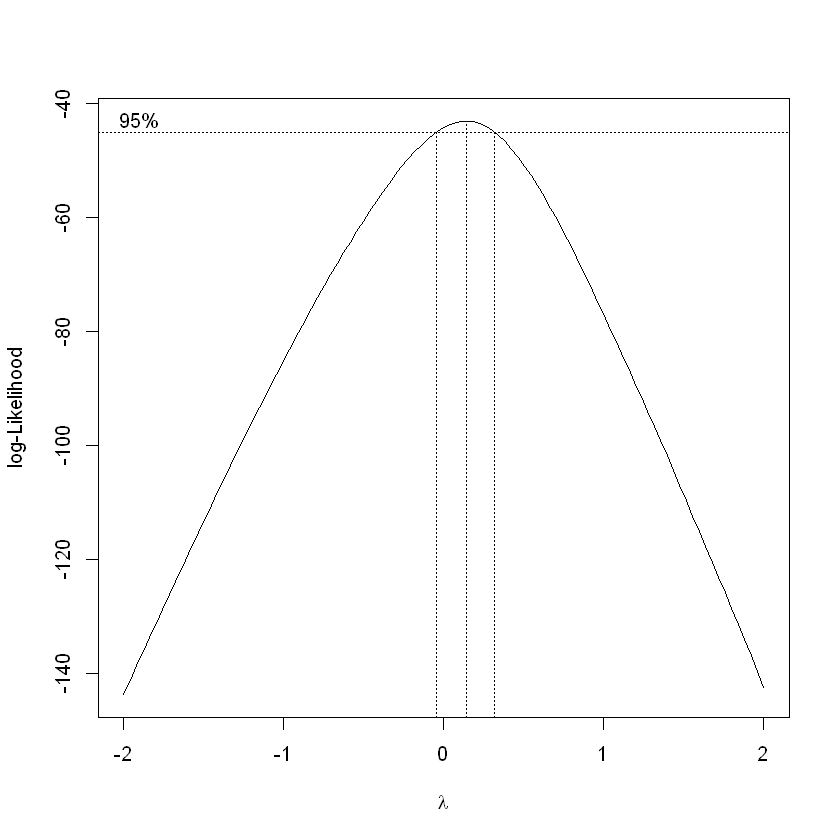

In [7]:
library(MASS)
boxcox(area~length,data=fjords.BC)

#### Anova (nested f test) to compare with previous model

In [18]:
anova(lm(area~length+width+length:width,data=fjords.BC),lm(area~length,data=fjords.BC))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
29,70461899,NA,NA,NA,NA
31,80490116,-2,-10028217,2.063656,0.1452349


### BC ($log(length)$)  - with all data
Adjusted R-squared:  0.7453  
+ Improvement in homoscedasticity
+ Normally distributed residuals

Try introduce width again


Call:
lm(formula = log(area) ~ length, data = fjords.BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21385 -0.37266 -0.06956  0.56855  1.12676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.150362   0.204580  25.175  < 2e-16 ***
length      0.055002   0.005654   9.727 6.18e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6847 on 31 degrees of freedom
Multiple R-squared:  0.7532,	Adjusted R-squared:  0.7453 
F-statistic: 94.62 on 1 and 31 DF,  p-value: 6.177e-11


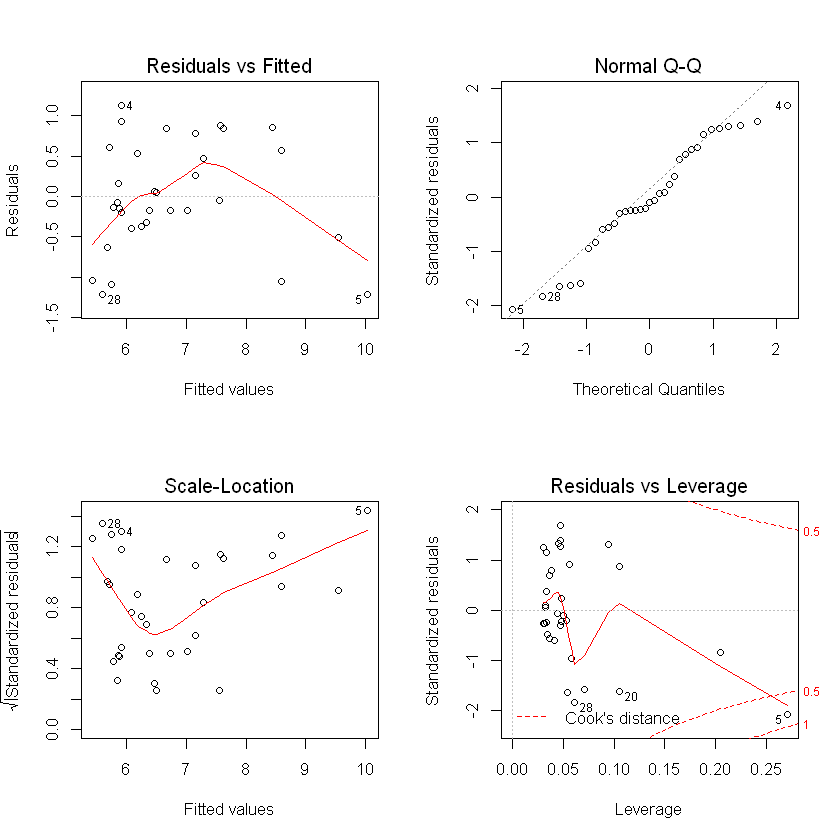

In [3]:
fit.BC <- lm(log(area)~length,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

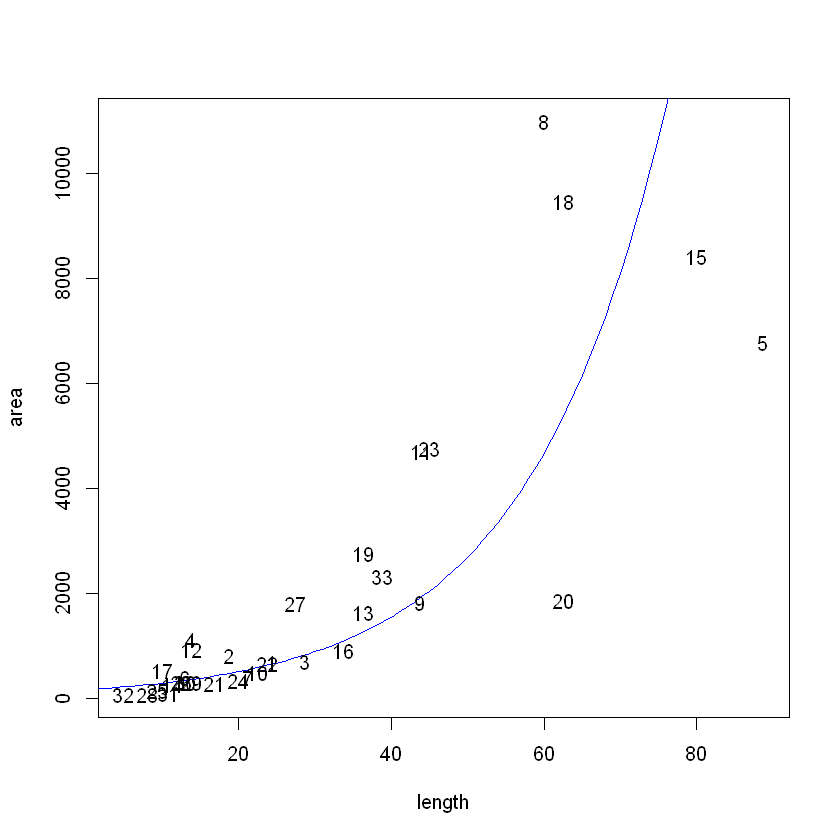

In [45]:
plot(area~length,type="n",data=fjords.BC)

density <- seq(0,100,1)
pr <- predict(fit.BC,data.frame(length=density))
lines(density,exp(pr),col="blue")

text(area~length,data=fjords.BC, labels =fjords.BC$ID)

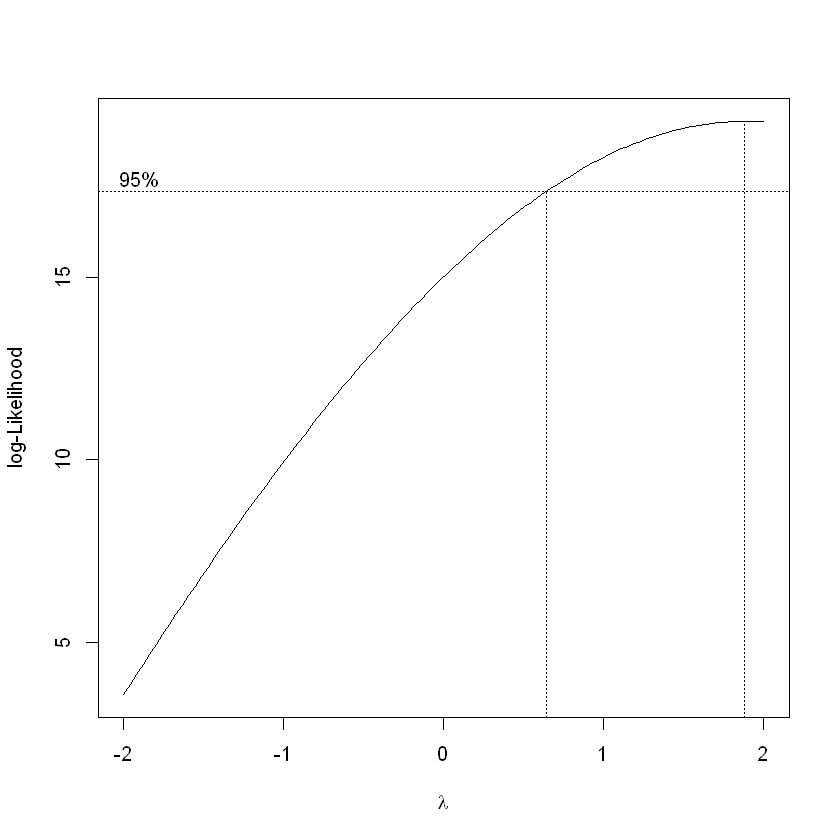

In [9]:
library(MASS)
boxcox(log(area)~length,data=fjords.BC)

### BC ($log(area)=length+width$)  - with all data
Adjusted R-squared:  0.7717
+ Width is now significant


Call:
lm(formula = log(area) ~ length + width, data = fjords.BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09817 -0.42802  0.03245  0.56255  1.13507 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.851321   0.238770  20.318  < 2e-16 ***
length      0.047202   0.006475   7.290 4.06e-08 ***
width       0.267362   0.124843   2.142   0.0405 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6482 on 30 degrees of freedom
Multiple R-squared:  0.7859,	Adjusted R-squared:  0.7717 
F-statistic: 55.08 on 2 and 30 DF,  p-value: 9.074e-11


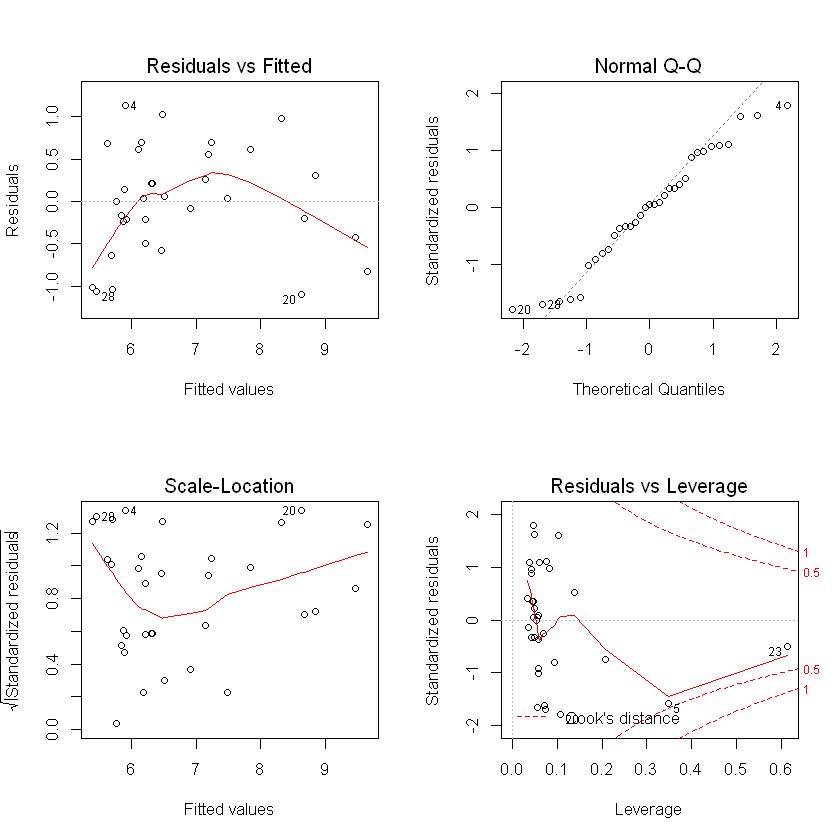

In [154]:
fit.BC <- lm(log(area)~length+width,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

#### Anova (nested f test) to compare with previous model

In [19]:
anova(lm(log(area)~length,data=fjords.BC),lm(log(area)~length+width,data=fjords.BC))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
31,14.53294,NA,NA,NA,NA
30,12.60578,1,1.927165,4.586385,0.04046702


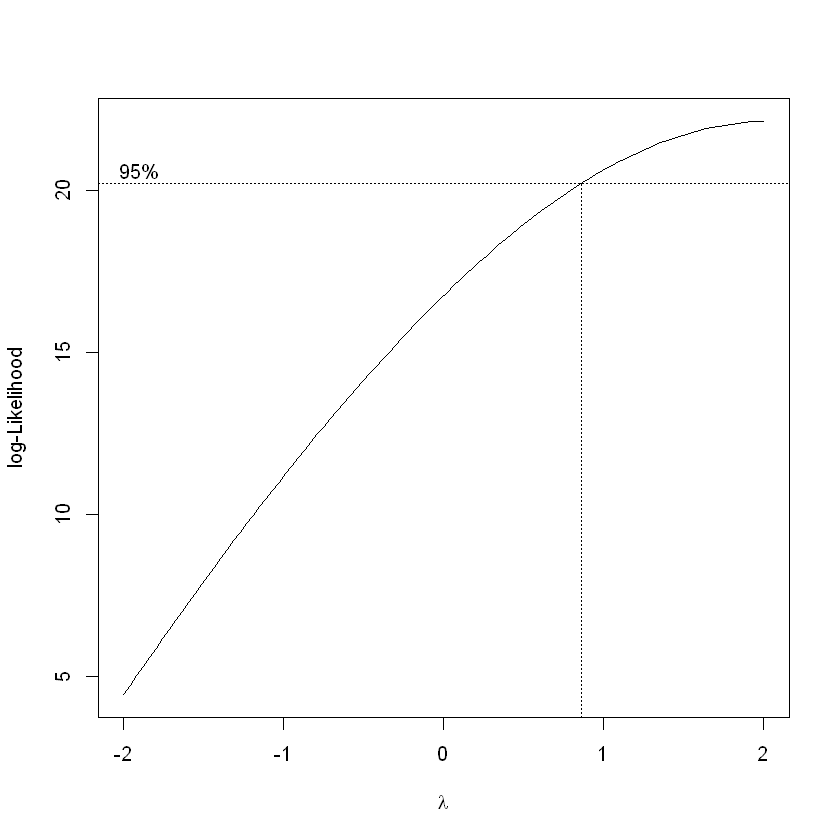

In [161]:
boxcox(log(area)~length+width,data=fjords.BC)

Suggests power >2 transformation of Y

### BC ($log(area)^2 = length$)  - with all data
Adjusted R-squared:  0.7799 


Call:
lm(formula = log(area)^2 ~ length, data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.562  -5.309  -1.687   7.327  15.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.67286    2.63601    9.36 1.52e-10 ***
length       0.77923    0.07286   10.70 6.28e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.822 on 31 degrees of freedom
Multiple R-squared:  0.7868,	Adjusted R-squared:  0.7799 
F-statistic: 114.4 on 1 and 31 DF,  p-value: 6.282e-12


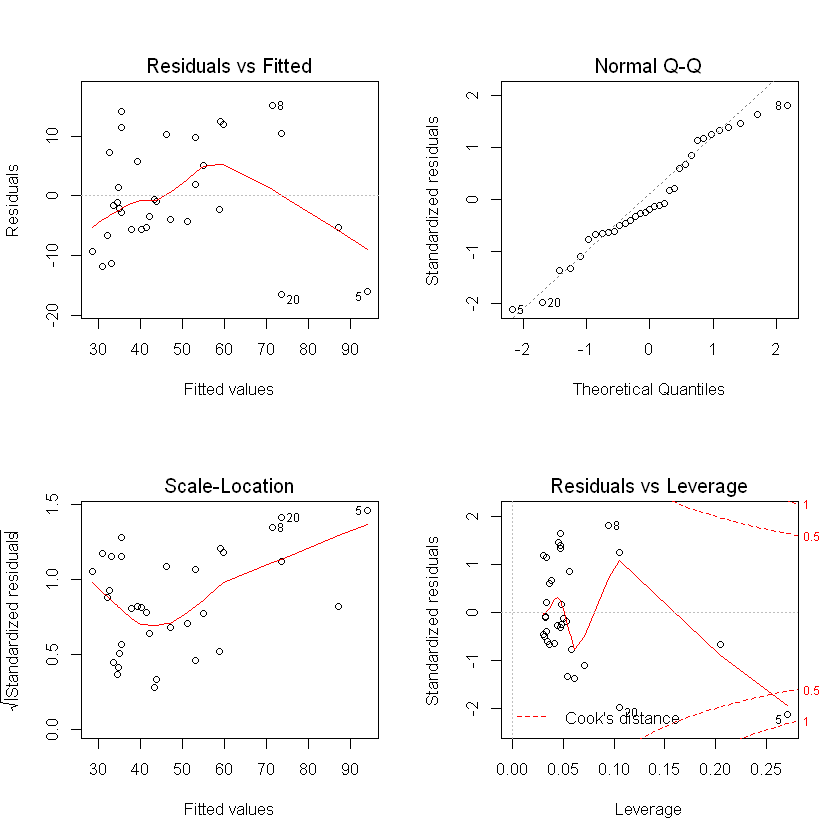

In [168]:
fit.BC <- lm(log(area)^2~length,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

In [21]:
summary(influence.measures(fit.BC))

Potentially influential observations of
	 lm(formula = log(area)^2 ~ length, data = fjords.BC) :

   dfb.1_ dfb.lngt dffit   cov.r   cook.d  hat    
5   0.79  -1.30_*  -1.38_*  1.07    0.84_*  0.27_*
15  0.18  -0.31    -0.34    1.30_*  0.06    0.20_*


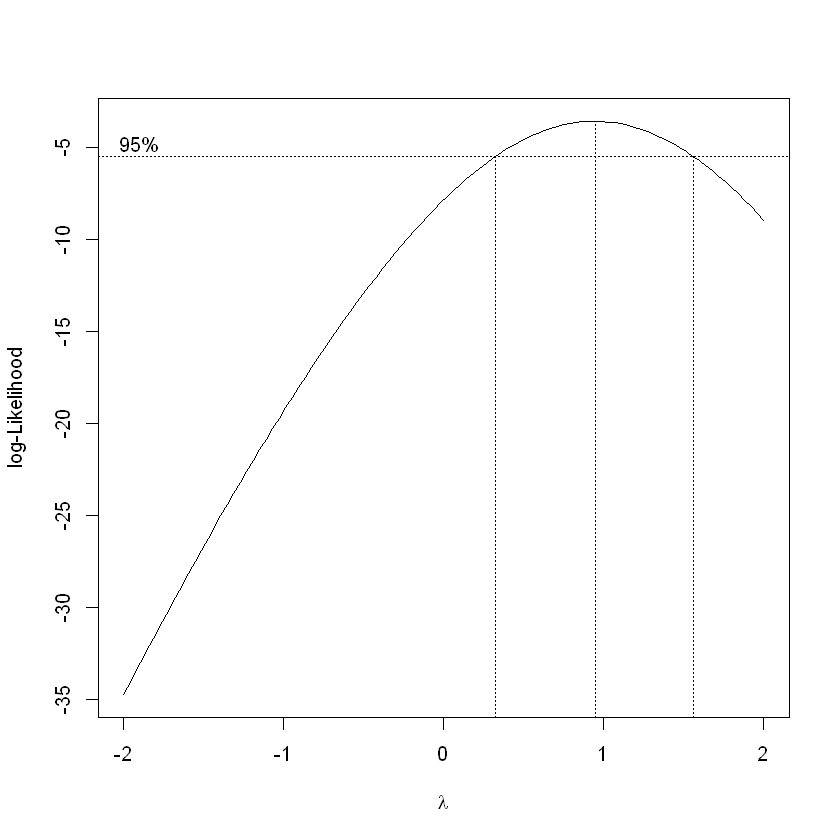

In [24]:
library(MASS)
boxcox(log(area)^2~length,data=fjords.BC)

### BC ($log(area)^3 = length$)  - with all data
Adjusted R-squared:  0.7945  
$log(area)^3 = length$ - Adjusted R-squared:  0.7932 


Call:
lm(formula = log(area)^3 ~ length, data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-199.26  -57.26  -21.64   69.04  199.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  97.1115    27.4922   3.532  0.00131 ** 
length        8.4859     0.7599  11.168 2.15e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 92.01 on 31 degrees of freedom
Multiple R-squared:  0.8009,	Adjusted R-squared:  0.7945 
F-statistic: 124.7 on 1 and 31 DF,  p-value: 2.15e-12


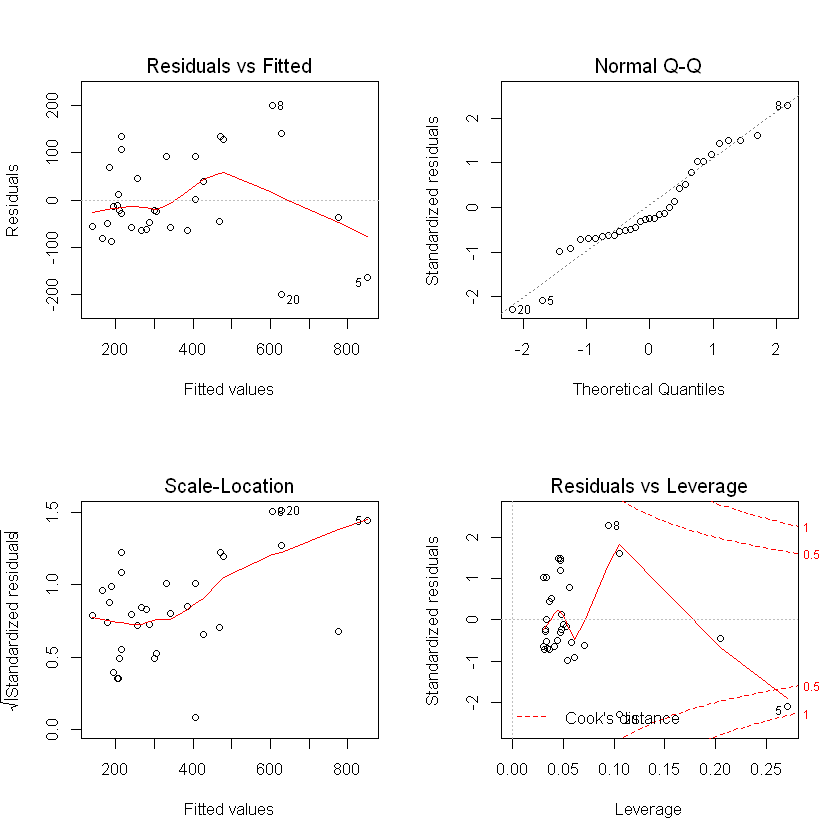

In [171]:
fit.BC <- lm(log(area)^3~length,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

### BC ( $log(area)^3 = length+ width$ )  - with all data
Adjusted R-squared:  0.8243 


Call:
lm(formula = log(area)^3 ~ length + width, data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-206.56  -50.30  -21.14   58.77  219.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  51.2921    31.3423   1.637   0.1122    
length        7.2908     0.8499   8.578 1.43e-09 ***
width        40.9656    16.3876   2.500   0.0181 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 85.09 on 30 degrees of freedom
Multiple R-squared:  0.8352,	Adjusted R-squared:  0.8243 
F-statistic: 76.04 on 2 and 30 DF,  p-value: 1.789e-12


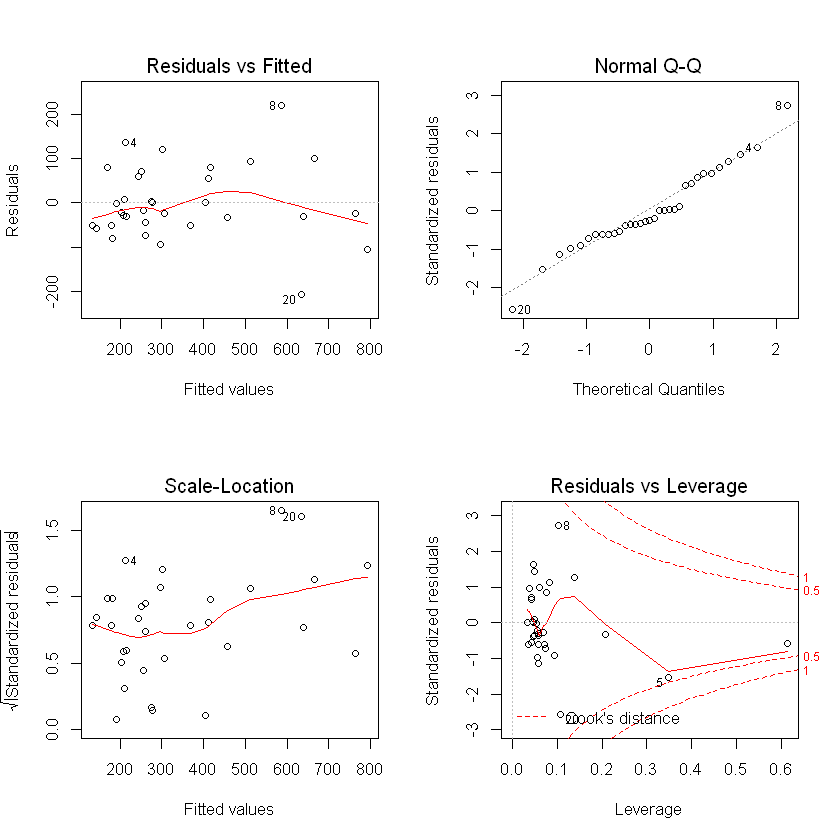

In [175]:
fit.BC <- lm(log(area)^3~length+width,data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

# Plot of Y transformation powers

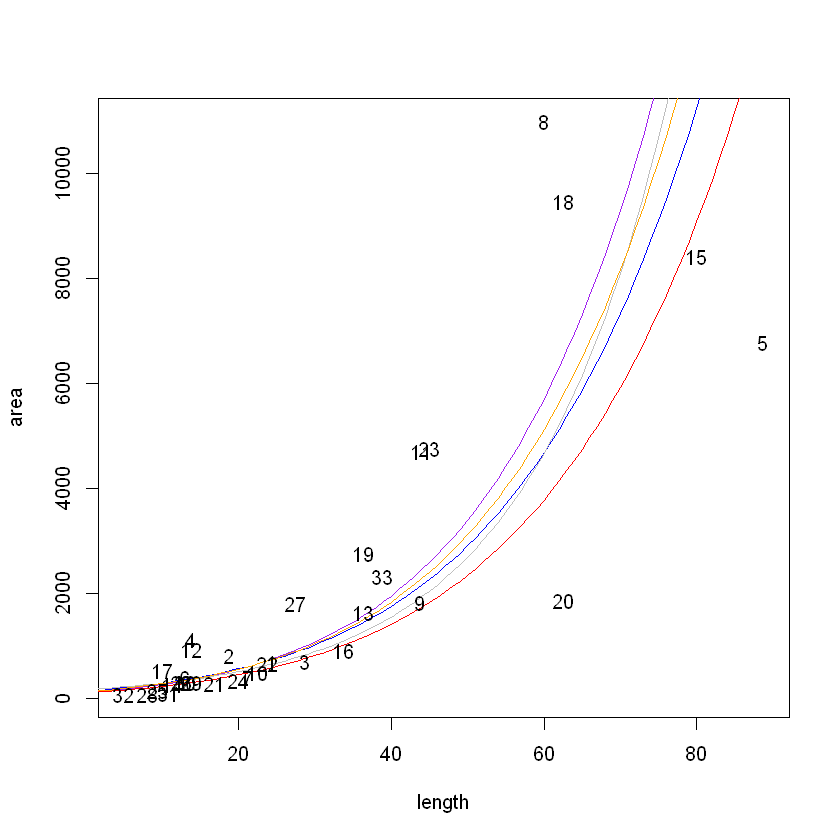

In [75]:
plot(area~length,type="n",data=fjords.BC)
density <- seq(0,100,1)

fit.BC <- lm(log(area)^2~length,data=fjords.BC)
pr <- predict(fit.BC,data.frame(length=density))
lines(density,exp(sqrt(pr)),col="blue")

fit.BC <- lm(log(area)^2~length,data=fjords.BC[!(fjords.BC$ID %in% c('5')),])
pr <- predict(fit.BC,data.frame(length=density))
lines(density,exp(sqrt(pr)),col="purple")

fit.BC <- lm(log(area)~length,data=fjords.BC)
pr <- predict(fit.BC,data.frame(length=density))
lines(density,exp(pr),col="grey")

# Plot reobust regression models
fit.BC.rlm <- rlm(log(area)^2~length,data=fjords.BC)
pr <- predict(fit.BC.rlm,data.frame(length=density))
lines(density,exp(sqrt(pr)),col="orange")

# Plot reobust regression models
fit.BC.lqs <- lqs(log(area)^2~length,data=fjords.BC)
pr <- predict(fit.BC.lqs,data.frame(length=density))
lines(density,exp(sqrt(pr)),col="red")

text(area~length,data=fjords.BC, labels =fjords.BC$ID)

# Plot of models with only length (not width)

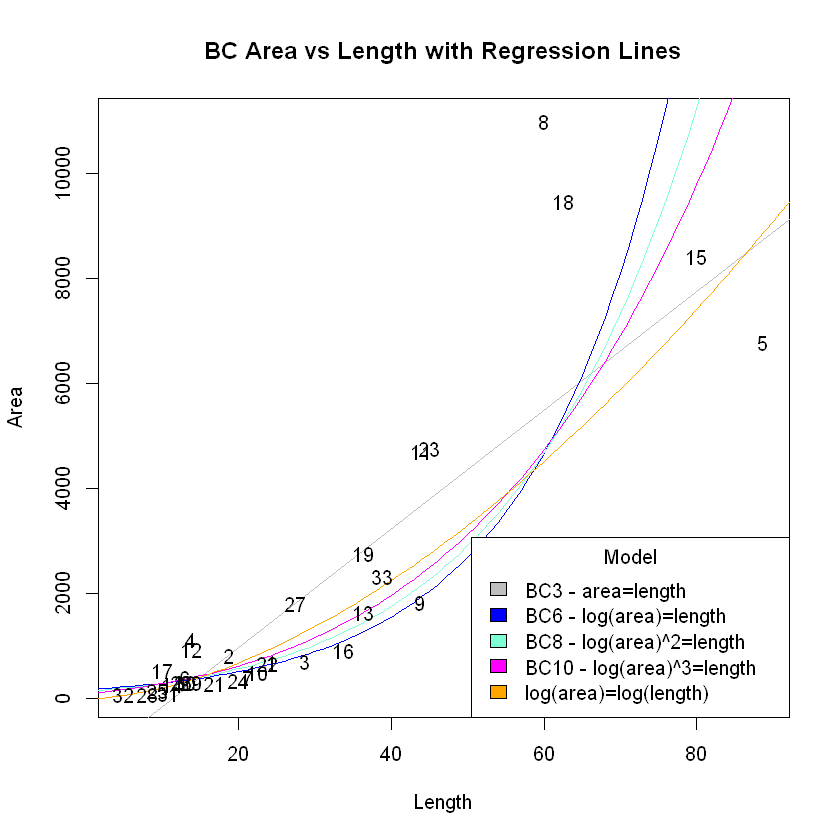

In [65]:
fit.BC <- lm(area~length,data=fjords.BC)
fit.BC2 <- lm(log(area)~length,data=fjords.BC)
fit.BC3<- lm(log(area)^2~length,data=fjords.BC)
fit.BC4<- lm(log(area)^3~length,data=fjords.BC)
fit.BC5<- lm(log(area)~log(length),data=fjords.BC)

plot(area~length,type="n",data=fjords.BC,
     ylab="Area", xlab="Length", main="BC Area vs Length with Regression Lines")
abline(fit.BC, col="gray")

density <- seq(0,100,1)
pr <- predict(fit.BC2,data.frame(length=density))
lines(density,exp(pr),col="blue")

density <- seq(0,100,1)
pr <- predict(fit.BC3,data.frame(length=density))
lines(density,exp(pr^(1/2)),col="aquamarine")

density <- seq(0,100,1)
pr <- predict(fit.BC4,data.frame(length=density))
lines(density,exp(pr^(1/3)),col="magenta")

density <- seq(0,100,1)
pr <- predict(fit.BC5,data.frame(length=density))
lines(density,exp(pr),col="orange")

text(area~length,data=fjords.BC, labels =fjords.BC$ID)

par(xpd=TRUE)

legend("bottomright", c("BC3 - area=length","BC6 - log(area)=length","BC8 - log(area)^2=length","BC10 - log(area)^3=length","log(area)=log(length)"), fill=c("gray","blue","aquamarine", "magenta","orange"), 
      title = "Model")
par(xpd=FALSE)

Try transform predictors instead of Y
### BC ( $log(area) = \sqrt{length}+ \sqrt{width}$ )  - with all data
Adjusted R-squared:  0.8264


Call:
lm(formula = log(area) ~ sqrt(length) + sqrt(width), data = fjords.BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13864 -0.32906 -0.08035  0.33030  1.17463 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.81508    0.40469   6.956 9.99e-08 ***
sqrt(length)  0.57414    0.06882   8.342 2.60e-09 ***
sqrt(width)   0.74846    0.36483   2.052    0.049 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5652 on 30 degrees of freedom
Multiple R-squared:  0.8373,	Adjusted R-squared:  0.8264 
F-statistic: 77.19 on 2 and 30 DF,  p-value: 1.483e-12


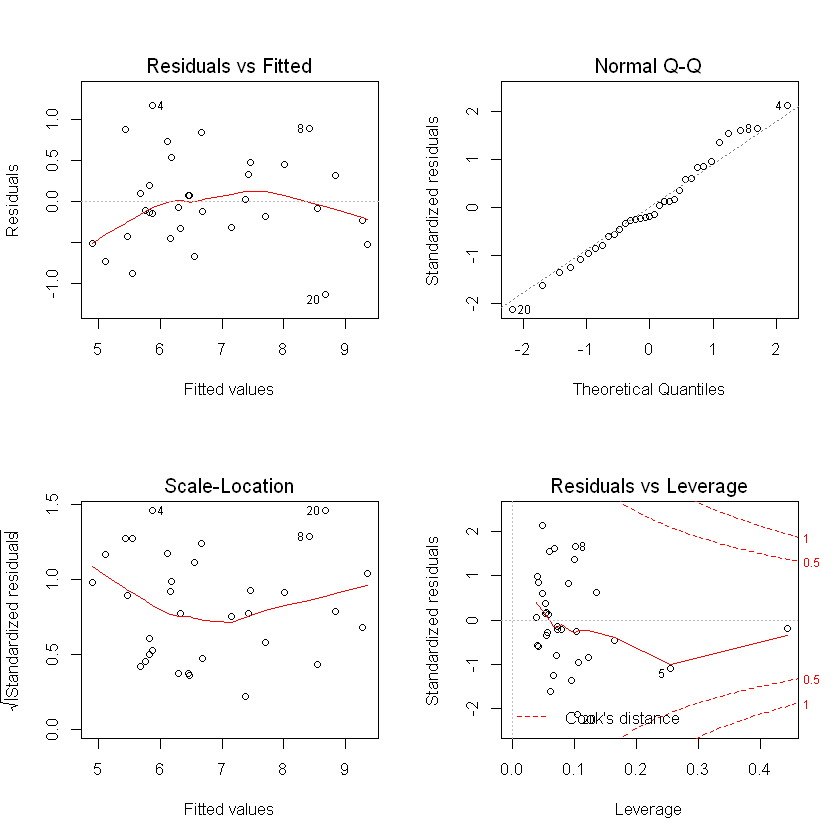

In [179]:
fit.BC <- lm(log(area)~sqrt(length)+sqrt(width),data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

### BC ( $log(area)^2 = \sqrt{length}+ \sqrt{width}$ )  - with all data
Adjusted R-squared:  0.8427


Call:
lm(formula = log(area)^2 ~ sqrt(length) + sqrt(width), data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.469  -4.132  -1.281   5.585  16.032 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -8.0264     5.3408  -1.503   0.1433    
sqrt(length)   7.9578     0.9083   8.761 9.06e-10 ***
sqrt(width)   10.9813     4.8147   2.281   0.0298 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.459 on 30 degrees of freedom
Multiple R-squared:  0.8525,	Adjusted R-squared:  0.8427 
F-statistic: 86.71 on 2 and 30 DF,  p-value: 3.397e-13


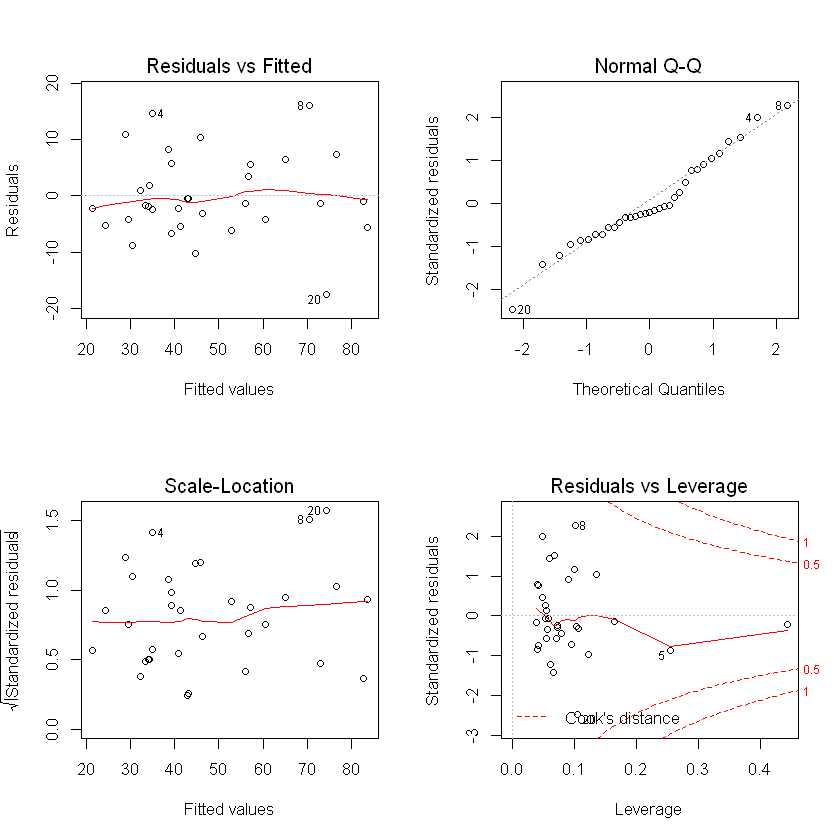

In [178]:
fit.BC <- lm(log(area)^2~sqrt(length)+sqrt(width),data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

### BC ( $area = \log{length} + \log{width} $ )  - with all data
Adjusted R-squared:  0.8451  
Residual standard error: 0.5339 

$area = 1.8068 + 1.4754\log{(length)} + 0.5919\log{(width)} $


Call:
lm(formula = area ~ log(length) + log(width), data = fjords.BC)

Residuals:
    Min      1Q  Median      3Q     Max 
-3421.5 -1049.0  -328.9   570.0  6189.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6365.6     1639.2  -3.883 0.000526 ***
log(length)   2420.1      596.3   4.058 0.000325 ***
log(width)    1455.8      894.5   1.628 0.114077    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1890 on 30 degrees of freedom
Multiple R-squared:  0.599,	Adjusted R-squared:  0.5722 
F-statistic:  22.4 on 2 and 30 DF,  p-value: 1.116e-06


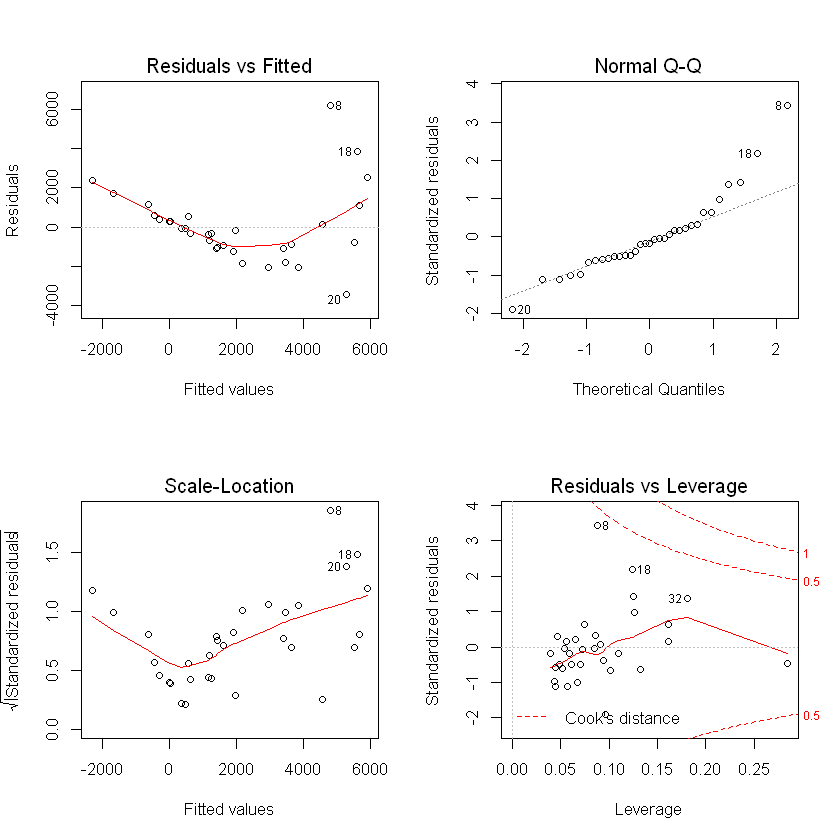

In [4]:
fit.BC <- lm(area~log(length)+log(width),data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))

### BC ( $\log area = \log{length} + \log{width} $ )  - with all data
Adjusted R-squared:  0.8451  
Residual standard error: 0.5339 

$\log{(area)} = 1.8068 + 1.4754\log{(length)} + 0.5919\log{(width)} $

In [34]:
(0.1684+0.2526)/0.5339

[1] 0.7885372

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log(length),1,48.773459,48.773459,171.079106,6.292313e-14
log(width),1,1.564814,1.564814,5.488784,2.596337e-02
Residuals,30,8.552791,0.285093,NA,NA



Call:
lm(formula = log(area) ~ log(length) + log(width), data = fjords.BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04379 -0.28746 -0.08373  0.28074  1.12093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8068     0.4630   3.903 0.000499 ***
log(length)   1.4754     0.1684   8.759  9.1e-10 ***
log(width)    0.5919     0.2526   2.343 0.025963 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5339 on 30 degrees of freedom
Multiple R-squared:  0.8548,	Adjusted R-squared:  0.8451 
F-statistic: 88.28 on 2 and 30 DF,  p-value: 2.697e-13


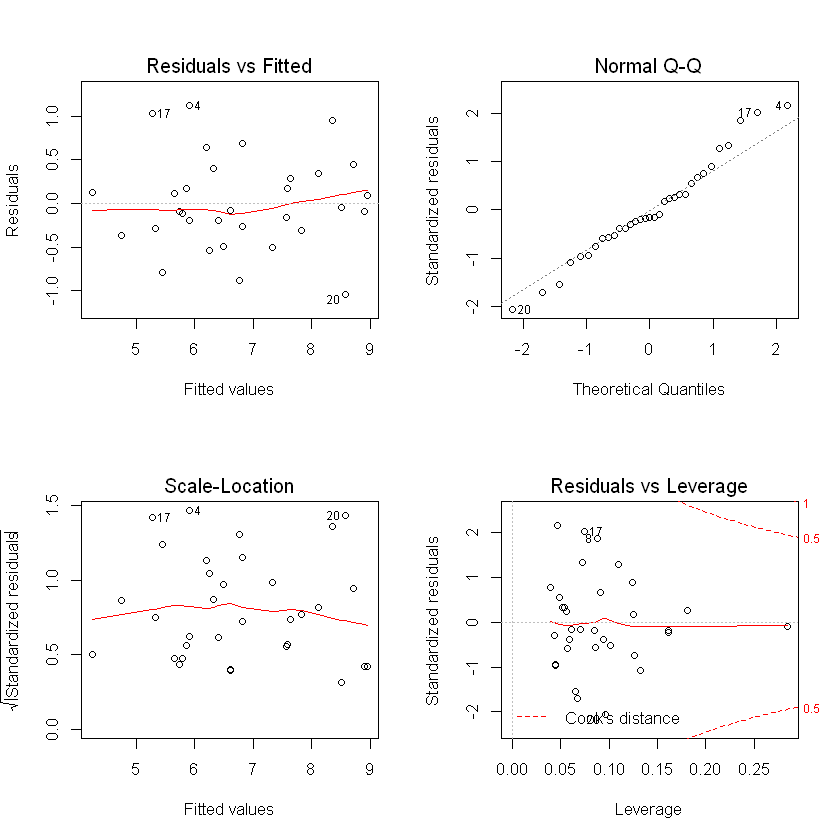

In [6]:
fit.BC <- lm(log(area)~log(length)+log(width),data=fjords.BC)
anova(fit.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))



In [80]:
summary(influence.measures(fit.BC))

Potentially influential observations of
	 lm(formula = log(area) ~ log(length) + log(width), data = fjords.BC) :

   dfb.1_ dfb.lg(l) dfb.lg(w) dffit cov.r   cook.d hat    
5   0.06  -0.07      0.03     -0.08  1.32_*  0.00   0.16  
21  0.01  -0.04      0.09     -0.10  1.31_*  0.00   0.16  
23 -0.01   0.02     -0.06     -0.06  1.55_*  0.00   0.28_*
32  0.11  -0.10      0.03      0.12  1.34_*  0.00   0.18  


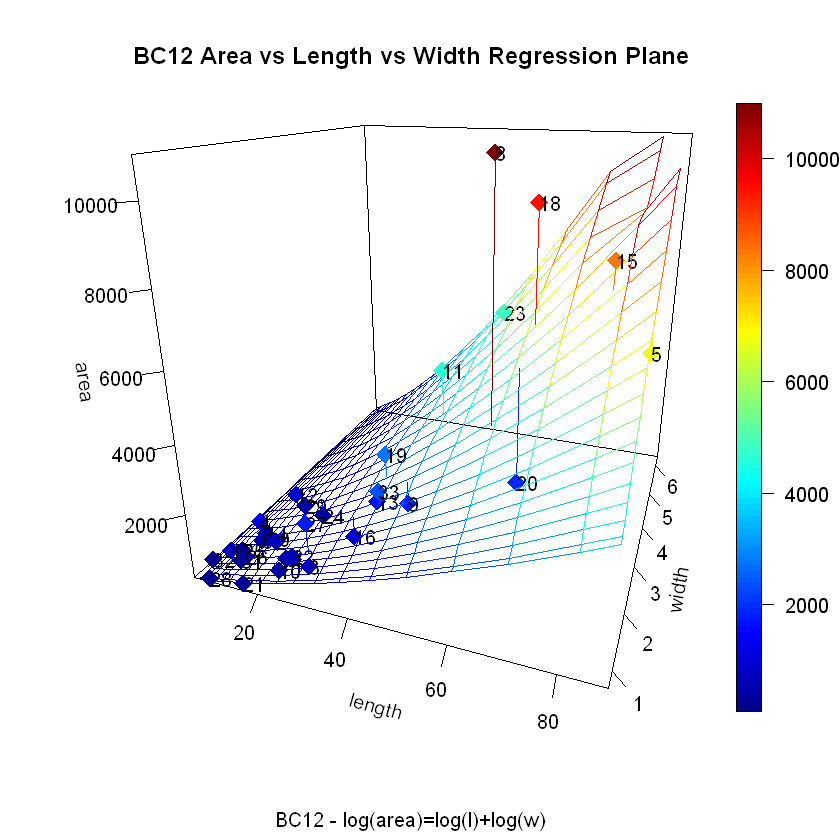

In [14]:
library(plot3D)
x<-log(fjords.BC[complete.cases(fjords.BC),]$length)
y<-log(fjords.BC[complete.cases(fjords.BC),]$width)
z<-log(fjords.BC[complete.cases(fjords.BC),]$area)

fit <- lm(z ~ x + y)

# predict values on regular xy grid
grid.lines = 20
x.pred <- seq(min(x), max(x), length.out = grid.lines)
y.pred <- seq(min(y), max(y), length.out = grid.lines)
xy <- expand.grid( x = x.pred, y = y.pred)
z.pred <- matrix(predict(fit, newdata = xy), 
                 nrow = grid.lines, ncol = grid.lines)

x.pred<-exp(x.pred)
y.pred<-exp(y.pred)
z.pred<-exp(z.pred)

# fitted points for droplines to surface
fitpoints <- exp(predict(fit))

# scatter plot with regression plane
scatter3D(exp(x), exp(y), exp(z), pch = 18, cex = 2, 
    theta = 20, phi = 20, ticktype = "detailed",
    xlab = "length", ylab = "width", zlab = "area",  
    surf = list(x = x.pred, y = y.pred, z = z.pred,  
    facets = NA, fit = fitpoints), sub = "BC12 - log(area)=log(l)+log(w)",main = "BC12 Area vs Length vs Width Regression Plane")

text3D(exp(x), exp(y), exp(z), labels=fjords.BC[complete.cases(fjords.BC),]$ID, add = TRUE)

### BC ( $\log area = \log{length} + \log{width} + interaction$ )  - with all data
Adjusted R-squared:  0.8401  
Residual standard error: 0.5425  
width & interaction are non significant


Call:
lm(formula = log(area) ~ log(length) + log(width) + log(length):log(width), 
    data = fjords.BC)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06401 -0.28920 -0.07862  0.29009  1.12804 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.94172    0.73973   2.625   0.0137 *  
log(length)             1.42967    0.25827   5.536 5.73e-06 ***
log(width)              0.32704    1.14983   0.284   0.7781    
log(length):log(width)  0.07985    0.33788   0.236   0.8148    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5425 on 29 degrees of freedom
Multiple R-squared:  0.855,	Adjusted R-squared:  0.8401 
F-statistic: 57.02 on 3 and 29 DF,  p-value: 2.82e-12


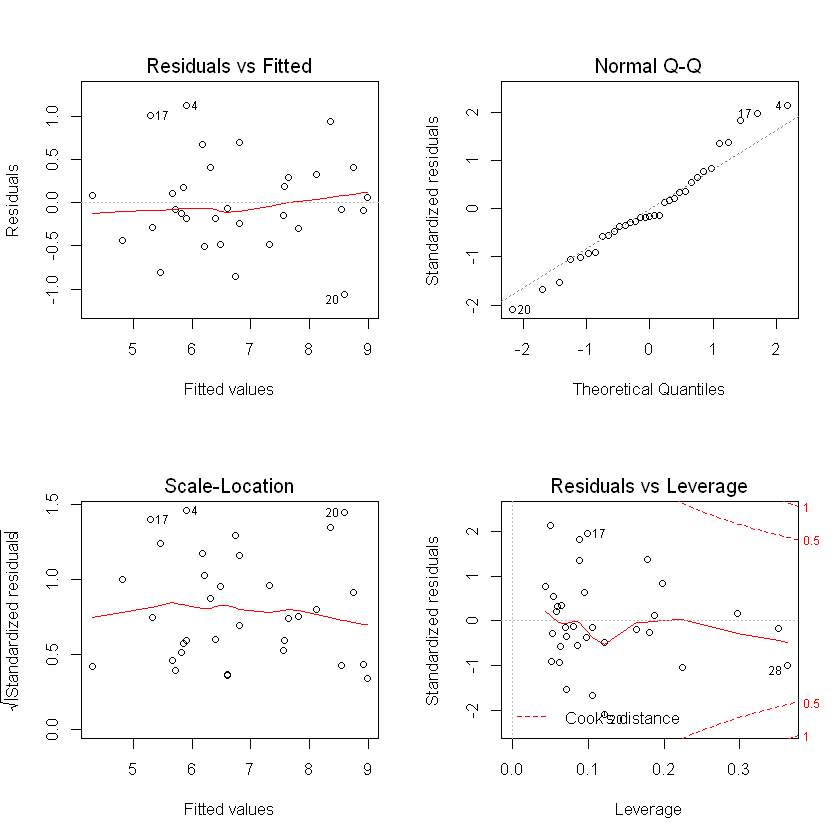

In [27]:
fit.BC <- lm(log(area)~log(length)+log(width)+log(length):log(width),data=fjords.BC)
summary(fit.BC)

par(mfrow=c(2,2))
plot(fit.BC)
par(mfrow=c(1,1))


### BC ($log(area)^2 = length$)  - with 5 removed
Adjusted R-squared:  0.7946 


Call:
lm(formula = log(area)^2 ~ length, data = fjords.BC[!(fjords.BC$ID %in% 
    c("5")), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-20.171  -5.272  -1.013   7.240  14.804 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.72257    2.62241   8.665 1.15e-09 ***
length       0.86818    0.07894  10.998 4.77e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.289 on 30 degrees of freedom
Multiple R-squared:  0.8013,	Adjusted R-squared:  0.7946 
F-statistic:   121 on 1 and 30 DF,  p-value: 4.774e-12


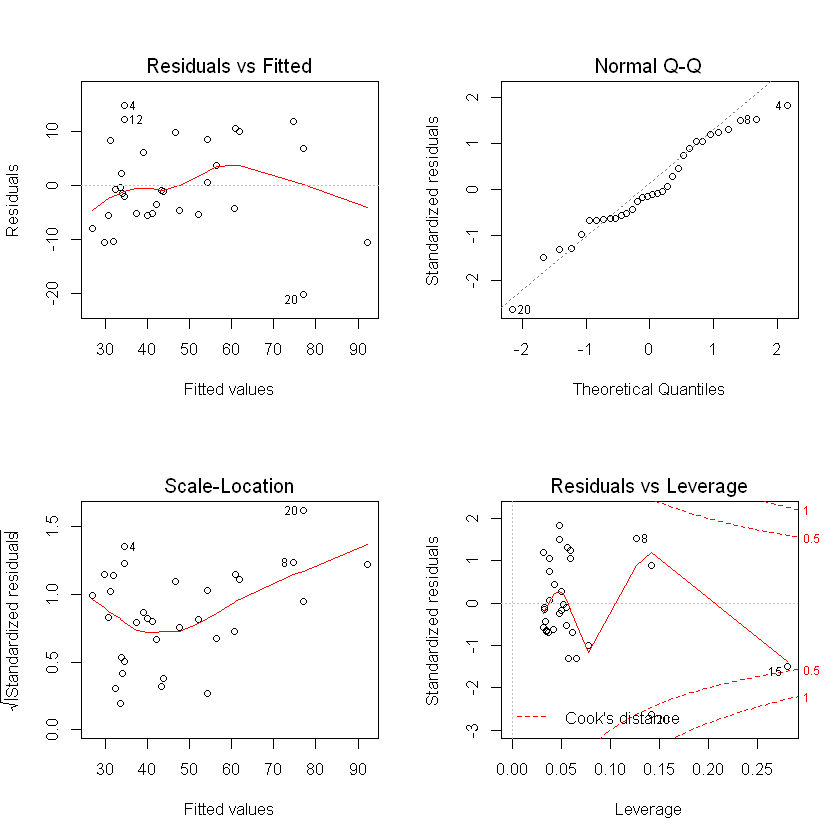

In [26]:
library(car)

fit <- lm(log(area)^2~length,data=fjords.BC[!(fjords.BC$ID %in% c('5')),])
summary(fit)

par(mfrow=c(2,2))
plot(fit)
par(mfrow=c(1,1))

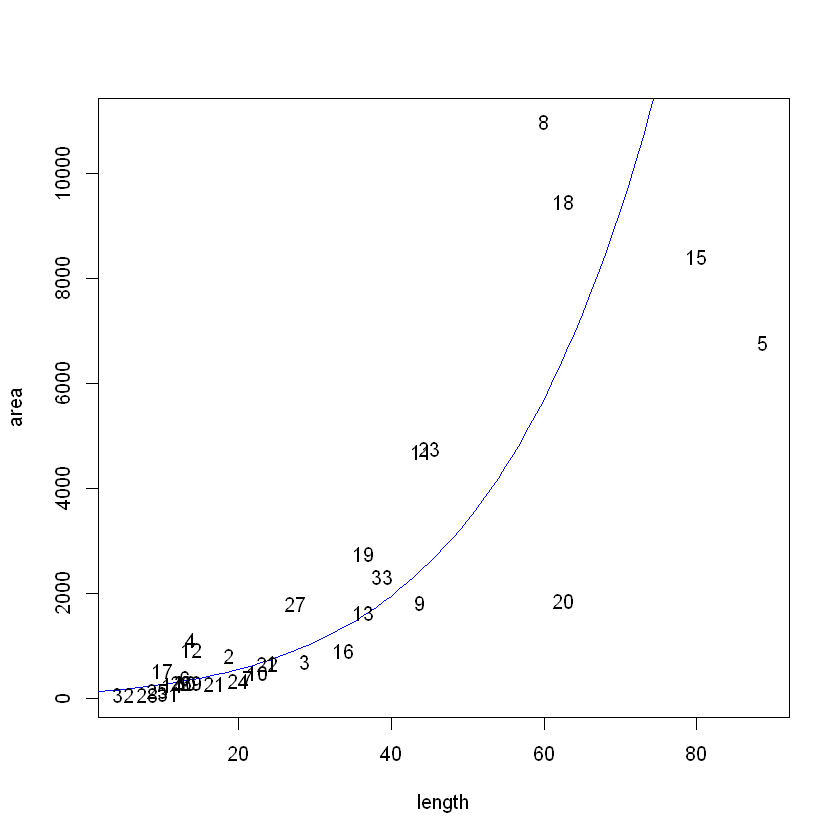

In [52]:
plot(area~length,type="n",data=fjords.BC)

density <- seq(0,100,1)
pr <- predict(fit.BC,data.frame(length=density))
lines(density,exp(sqrt(pr)),col="blue")

text(area~length,data=fjords.BC, labels =fjords.BC$ID)

In [23]:
summary(influence.measures(fit.BC))

Potentially influential observations of
	 lm(formula = log(area)^2 ~ length, data = fjords.BC[!(fjords.BC$ID %in%      c("5")), ]) :

   dfb.1_ dfb.lngt dffit   cov.r   cook.d hat    
15  0.57  -0.90    -0.95_*  1.28_*  0.43   0.28_*
20  0.56  -1.06_*  -1.20_*  0.74_*  0.57   0.14  


## Robust regression

[1] 0.4115718

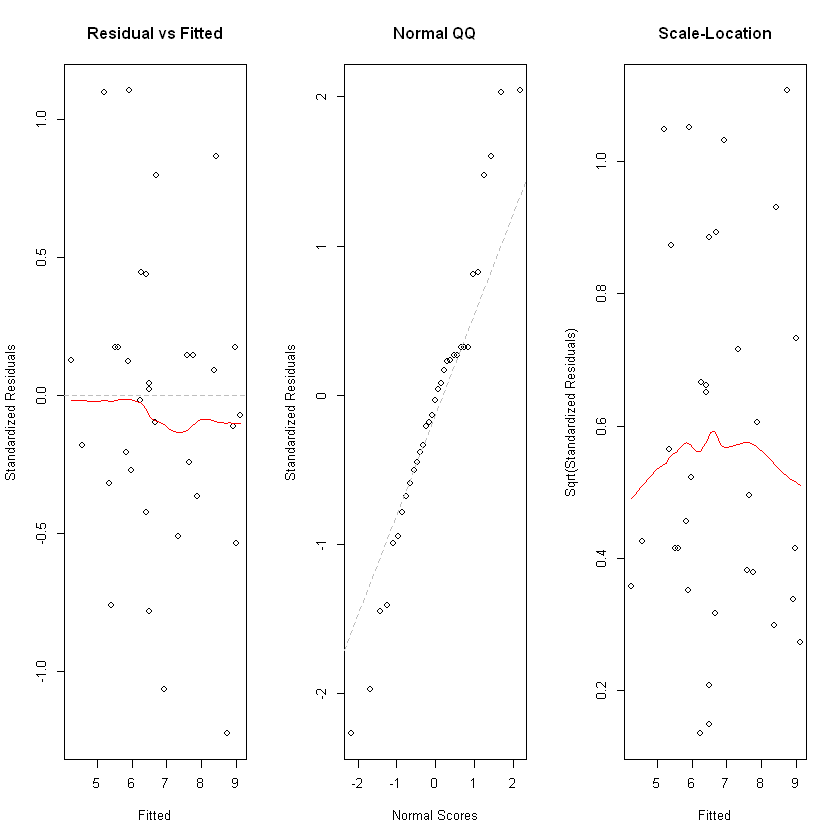

In [39]:
fit <- lqs(log(area)~log(length)+log(width),data=fjords.BC)
fit$crit
#layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
#plot(area ~ length, data=fjords.BC, ylab="Area", xlab="Length", main="Area vs Length")
#abline(fit,col="darkgreen")

par(mfrow=c(1,3))
scatter.smooth(fit$residuals~fit$fitted.values, ylab="Standardized Residuals", xlab="Fitted", main="Residual vs Fitted", lpars = list(col = "red"))
abline(0,0,col="grey", lty=2)

qqnorm(fit$residuals/sd(fit$residuals), ylab="Standardized Residuals", xlab="Normal Scores", main="Normal QQ") 
qqline(fit$residuals/sd(fit$residuals), col="grey", lty=2)

scatter.smooth(sqrt(abs(fit$residuals))~fit$fitted.values, ylab="Sqrt(Standardized Residuals)", xlab="Fitted", main="Scale-Location", lpars = list(col = "red"))
#plot(sqrt(abs(fit$residuals))~fit$fitted.values, ylab="Sqrt(Standardized Residuals)", xlab="Fitted", main="Scale-Location")
abline(0,0,col="grey", lty=2)

par(mfrow=c(1,1))

## RLM
### BC ( $\log area = \log{length} + \log{width} $ )  - with all data
Residual standard error: 0.4054  
$\log{(area)} = 1.6804 + 1.4965\log{(length)} + 0.6554\log{(width)} $

Warning message:
"package 'sfsmisc' was built under R version 3.3.3"


	robust F-test (as if non-random weights)

data:  from rlm(formula = log(area) ~ log(length) + log(width), data = fjords.BC)
F = 89.583, p-value = 1.621e-10
alternative hypothesis: true log(length) is not equal to 0



	robust F-test (as if non-random weights)

data:  from rlm(formula = log(area) ~ log(length) + log(width), data = fjords.BC)
F = 7.9411, p-value = 0.008472
alternative hypothesis: true log(width) is not equal to 0



Call: rlm(formula = log(area) ~ log(length) + log(width), data = fjords.BC)
Residuals:
     Min       1Q   Median       3Q      Max 
-1.07713 -0.23118 -0.03754  0.27347  1.16647 

Coefficients:
            Value  Std. Error t value
(Intercept) 1.6804 0.4382     3.8351 
log(length) 1.4965 0.1594     9.3881 
log(width)  0.6554 0.2391     2.7410 

Residual standard error: 0.4054 on 30 degrees of freedom

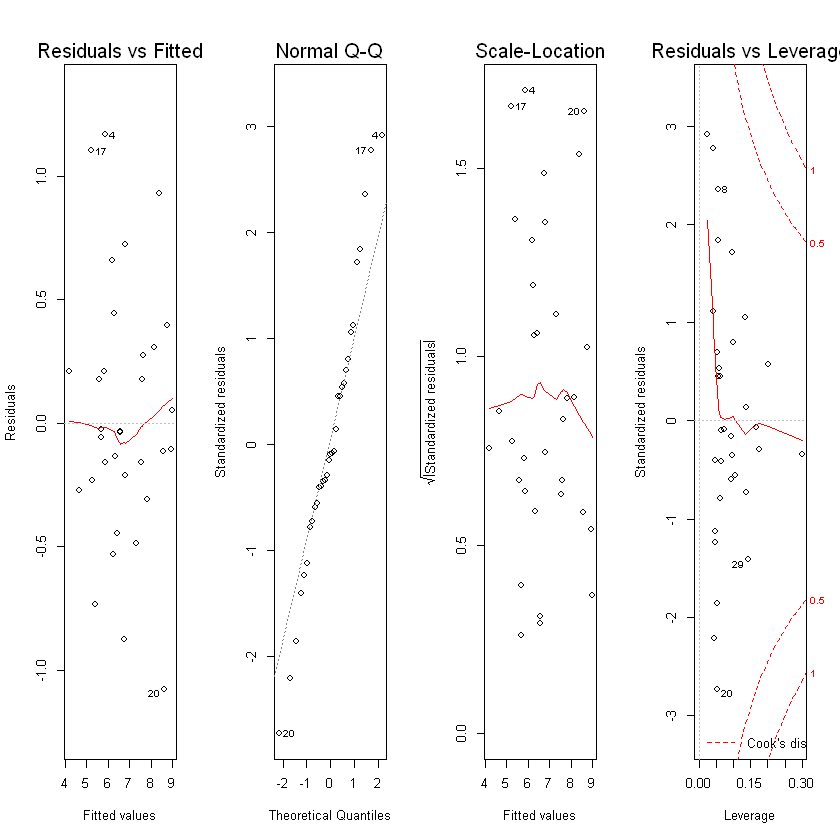

In [7]:
library(MASS)
library(sfsmisc)
fit <- rlm(log(area)~log(length)+log(width),data=fjords.BC)

#https://en.wikipedia.org/wiki/Wald_test
f.robftest(fit, var="log(length)")
f.robftest(fit, var="log(width)")


summary(fit)

par(mfrow=c(1,4))
plot(fit)
par(mfrow=c(1,1))

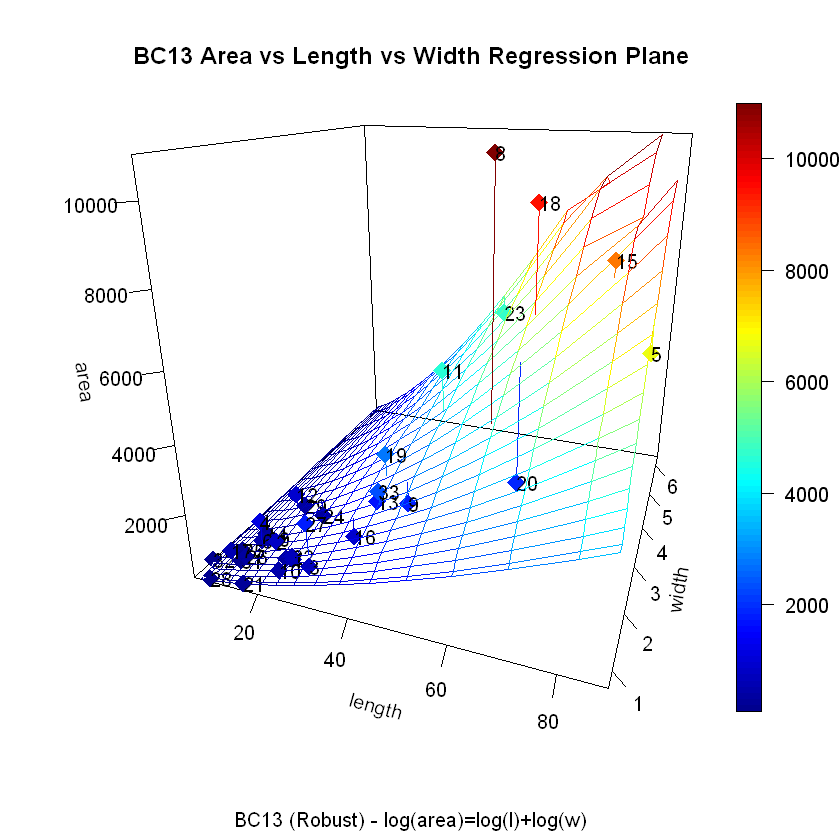

In [15]:
library(plot3D)

x<-log(fjords.BC[complete.cases(fjords.BC),]$length)
y<-log(fjords.BC[complete.cases(fjords.BC),]$width)
z<-log(fjords.BC[complete.cases(fjords.BC),]$area)

fit <- rlm(z ~ x + y)

# predict values on regular xy grid
grid.lines = 20
x.pred <- seq(min(x), max(x), length.out = grid.lines)
y.pred <- seq(min(y), max(y), length.out = grid.lines)
xy <- expand.grid( x = x.pred, y = y.pred)
z.pred <- matrix(predict(fit, newdata = xy), 
                 nrow = grid.lines, ncol = grid.lines)

x.pred<-exp(x.pred)
y.pred<-exp(y.pred)
z.pred<-exp(z.pred)

# fitted points for droplines to surface
fitpoints <- exp(predict(fit))

# scatter plot with regression plane
scatter3D(exp(x), exp(y), exp(z), pch = 18, cex = 2, 
    theta = 20, phi = 20, ticktype = "detailed",
    xlab = "length", ylab = "width", zlab = "area",  
    surf = list(x = x.pred, y = y.pred, z = z.pred,  
    facets = NA, fit = fitpoints), sub = "BC13 (Robust) - log(area)=log(l)+log(w)",main = "BC13 Area vs Length vs Width Regression Plane")

text3D(exp(x), exp(y), exp(z), labels=fjords.BC[complete.cases(fjords.BC),]$ID, add = TRUE)